# Experimental Analysis: Confinement Regimes

| Parameters | signals | units |
|------------|---------|-------|
| Plasma current	| 	`sipmes`	| 	MA |
| Electron temperature	| 	`gshte`	| 	keV |
| Line integrated electron density	| 	`gnl`	| 	m-2	| 
| Magnetic field		| `rbtor`		| T	| 
| ICRH /  LHCD power	| 	`gpuifci%4` /  `gphyb%3`	| 	MW	| 
| Ohmic power		| `spohm`		| MW	| 
| Diamagnetic energy		| `swdia`	| 	MJ	| 
| Plasma elongation		| `sellip`		| 
| Minor/Major radius		| `saeqa` /  `srmaj`		| m	| 


| Shot number |	B toroidal (T)	| Duration (s) |
|-------------|-----------------|--------------|
| #40999	| 3.18	| 5.7| 
| #41003	| 3.87	| 13.0| 
| #41004	| 3.87	| 13.0| 
| #41005	| 3.87	| 14.5| 
| #41006	| 3.87	| 13.1| 
| #41007	| 3.87	| 13.0| 
| #41008	| 3.87	| 13.0| 
| #41009	| 3.87	| 13.0| 
| #41010	| 3.87	| 13.0| 
| #41011	| 3.87	| 12.9| 
| #41012	| 3.87	| 12.9| 
| #41013	| 3.87	| 13.1| 


Below we retrieve the data locally, in order to be able to work without the intranet access.

In [5]:
%matplotlib notebook
import pywed as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [6]:
# Pulses and signal lists
pulses = [40999, 41003, 41004, 41005, 41006, 41007, 41008, 41009, 41010, 41011, 41012, 41013]
signals = ['sipmes', 'gshte', 'gnl', 'rbtor', 'gpuifci%4', 'gphyb%3', 'spohm', 'swdia', 'sellip', 'saeqa', 'srmaj', 'gne', 'staudia']

In [25]:
# retrieve all the data locally
if Path('Tore_Supra.npz').exists():
    data = np.load('Tore_Supra.npz')['arr_0'].all()
else:
    data = {}
    for pulse in pulses:
        data[pulse] = {}
        for signal in signals:
            try:
                y, t = pd.tsbase(pulse, signal, nargout=2) 
                data[pulse][signal] = [t,y]
            except PyWEDException as e: # if signal does not exist, then not big deal
                pass
    np.savez('Tore_Supra', data) 

In [26]:
db=data

## Which plasma discharges are not suitable ?

In [28]:
fig,ax=plt.subplots()

for shot in db.keys():
    t, Ip = db[shot]['sipmes']
    ax.plot(t, Ip, label=str(shot))
ax.legend()
ax.set_xlim(-1, 16.5)
ax.set_ylim(0, 1.3)

<IPython.core.display.Javascript object>

(0, 1.3)

There is a problem with shot \#40999, which should not be used in the latter analysis. Other shot seems fine.

In [29]:
fig,ax=plt.subplots()

for shot in db.keys():
    if shot == 40999:
        pass
    else:
        t, ne = db[shot]['gnl']
        ax.plot(t, ne[:,3] , label=str(shot)) # central chord
ax.legend()
ax.set_xlim(0,16.5)
ax.set_ylim(0,7e19)

<IPython.core.display.Javascript object>

(0, 7e+19)

Plasma Energy content

## Energy Confinement Time and Lawson Criterion

In [30]:
# times for plateau
t_plateau1 = (4, 6)
t_plateau2 = (8, 10)

W_means = []
P_means = []
tau_means = []

# for each shot (except the first one), 
# get the average parameters for each plateau 
for shot in db.keys():
    if shot == 40999:
        pass
    else:
        t_W, W = db[shot]['swdia']
        t_P, P = db[shot]['spohm']
        t_tau, tau = db[shot]['staudia'] 
        
        # get the indexes corresponding to each plateaux, 
        # and average the signal 
        idx_plateau1 = np.where((t_W > t_plateau1[0]) & (t_W < t_plateau1[1]))[0]
        idx_plateau2 = np.where((t_W > t_plateau2[0]) & (t_W < t_plateau2[1]))[0]
        W_mean1 = W[idx_plateau1].mean()
        W_mean2 = W[idx_plateau2].mean()
        W_means.append([W_mean1, W_mean2])

        idx_plateau1 = np.where((t_P > t_plateau1[0]) & (t_P < t_plateau1[1]))[0]
        idx_plateau2 = np.where((t_P > t_plateau2[0]) & (t_P < t_plateau2[1]))[0]
        P_mean1 = P[idx_plateau1].mean()
        P_mean2 = P[idx_plateau2].mean()
        P_means.append([P_mean1, P_mean2])
        
        idx_plateau1 = np.where((t_tau > t_plateau1[0]) & (t_tau < t_plateau1[1]))[0]
        idx_plateau2 = np.where((t_tau > t_plateau2[0]) & (t_tau < t_plateau2[1]))[0]
        tau_mean1 = tau[idx_plateau1].mean()
        tau_mean2 = tau[idx_plateau2].mean()
        tau_means.append([tau_mean1, tau_mean2])

W_means = np.asarray(W_means)
P_means = np.asarray(P_means)
_tau_means = np.asarray(tau_means)

In [31]:
# average confinement times :
tau_means = W_means/P_means

<IPython.core.display.Javascript object>


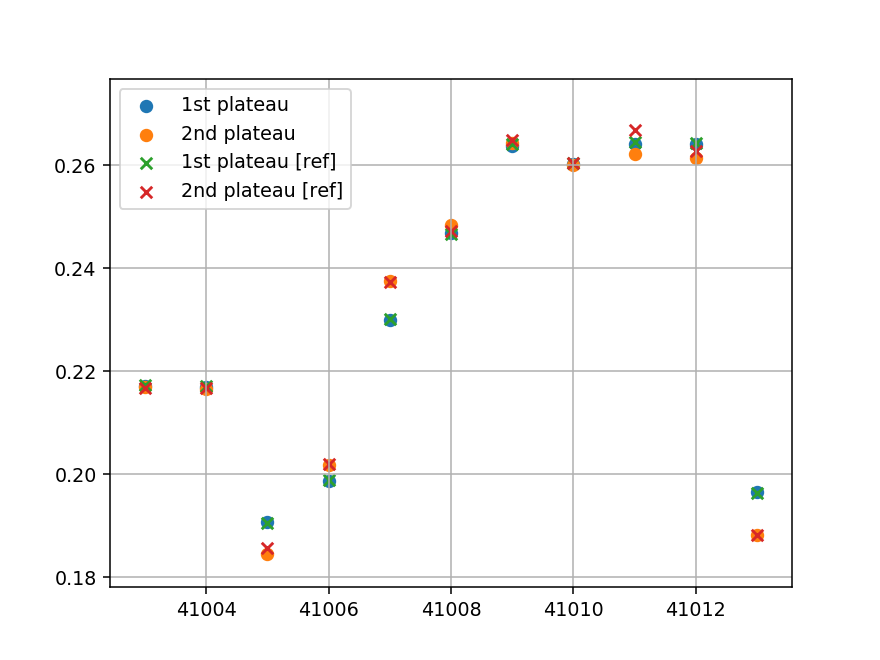

In [37]:
fig,ax = plt.subplots()
ax.scatter(pulses[1:] , tau_means[:,0], label='1st plateau')
ax.scatter(pulses[1:] , tau_means[:,1], label='2nd plateau')
ax.scatter(pulses[1:] , _tau_means[:,0], marker='x', label='1st plateau [ref]')
ax.scatter(pulses[1:] , _tau_means[:,1], marker='x', label='2nd plateau [ref]')
ax.legend()
ax.grid(True)


# CSS Syling

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()